In [40]:
from tensorflow.keras.datasets.fashion_mnist import load_data

# Download DATASET
(x_train,y_train),(x_test,y_test) = load_data()
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


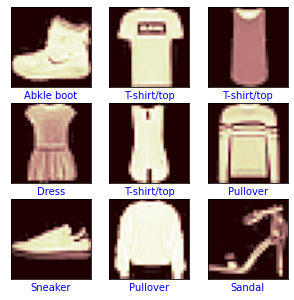

In [41]:
#데이터 그려보기

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['T-shirt/top' ,'Trouser' ,'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Abkle boot']

sample_size =9
random_idx = np.random.randint(60000,size=sample_size)
plt.figure(figsize=(5,5))
for i,idx in enumerate(random_idx):
    plt.subplot(3,3,1+i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],cmap="pink")
    plt.xlabel(class_names[y_train[i]],color="blue")
plt.show()

In [42]:
#Preprocessing
# value -> 0~255
x_train = x_train/255
x_test = x_test/255

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train) # one-hot encoding 

y_test = to_categorical(y_test)

#검증 DATASET CREATE
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.3,random_state=777)

In [47]:
#CREATE MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

first_model = Sequential()

first_model.add(Flatten(input_shape=(28,28))) # MNIST 와 다르게  reshape을 하지 않고 2차원 데이터 형태로 입력
first_model.add(Dense(64,activation="relu"))
first_model.add(Dense(32,activation="relu"))
first_model.add(Dense(10,activation="softmax"))

#MODEL SETTING
first_model.compile(optimizer="adam",
                   loss = "categorical_crossentropy",
                   metrics=["acc"])

first_history = first_model.fit(x_train,y_train,
                                batch_size = 128,
                                epochs = 50,
                                validation_data = (x_val,y_val))


Epoch 1/50
329/329 [==============================] - 0s 1ms/step - loss: 0.6679 - acc: 0.7727 - val_loss: 0.4653 - val_acc: 0.8432
Epoch 2/50
329/329 [==============================] - 0s 1ms/step - loss: 0.4389 - acc: 0.8476 - val_loss: 0.4339 - val_acc: 0.8467
Epoch 3/50
329/329 [==============================] - 0s 988us/step - loss: 0.3987 - acc: 0.8587 - val_loss: 0.3924 - val_acc: 0.8629
Epoch 4/50
329/329 [==============================] - 0s 1ms/step - loss: 0.3728 - acc: 0.8662 - val_loss: 0.3754 - val_acc: 0.8701
Epoch 5/50
329/329 [==============================] - 0s 1ms/step - loss: 0.3481 - acc: 0.8744 - val_loss: 0.3598 - val_acc: 0.8739
Epoch 6/50
329/329 [==============================] - 0s 1ms/step - loss: 0.3343 - acc: 0.8803 - val_loss: 0.3676 - val_acc: 0.8687
Epoch 7/50
329/329 [==============================] - 0s 1ms/step - loss: 0.3227 - acc: 0.8845 - val_loss: 0.3391 - val_acc: 0.8802
Epoch 8/50
329/329 [==============================] - 0s 1ms/step - loss: 

In [50]:
#CREATE MODEL

second_model = Sequential()
second_model.add(Flatten(input_shape=(28,28)))
second_model.add(Dense(128,activation="relu"))
second_model.add(Dense(128,activation="relu"))
second_model.add(Dense(32,activation="relu"))
second_model.add(Dense(10,activation="softmax"))

second_model.compile(optimizer = "adam",
                    loss="categorical_crossentropy",
                    metrics = ['acc'])

second_history = second_model.fit(x_train,y_train,
                epochs=50,
                batch_size=128,
                validation_data=(x_val,y_val))


Epoch 1/50
329/329 [==============================] - 1s 2ms/step - loss: 0.6066 - acc: 0.7870 - val_loss: 0.4619 - val_acc: 0.8368
Epoch 2/50
329/329 [==============================] - 1s 2ms/step - loss: 0.4097 - acc: 0.8522 - val_loss: 0.3759 - val_acc: 0.8661
Epoch 3/50
329/329 [==============================] - 0s 1ms/step - loss: 0.3586 - acc: 0.8698 - val_loss: 0.3673 - val_acc: 0.8665
Epoch 4/50
329/329 [==============================] - 0s 1ms/step - loss: 0.3344 - acc: 0.8763 - val_loss: 0.3627 - val_acc: 0.8720
Epoch 5/50
329/329 [==============================] - 1s 2ms/step - loss: 0.3106 - acc: 0.8869 - val_loss: 0.3326 - val_acc: 0.8805
Epoch 6/50
329/329 [==============================] - 1s 2ms/step - loss: 0.3000 - acc: 0.8878 - val_loss: 0.3735 - val_acc: 0.8623
Epoch 7/50
329/329 [==============================] - 0s 1ms/step - loss: 0.2830 - acc: 0.8945 - val_loss: 0.3226 - val_acc: 0.8844
Epoch 8/50
329/329 [==============================] - 0s 1ms/step - loss: 0.

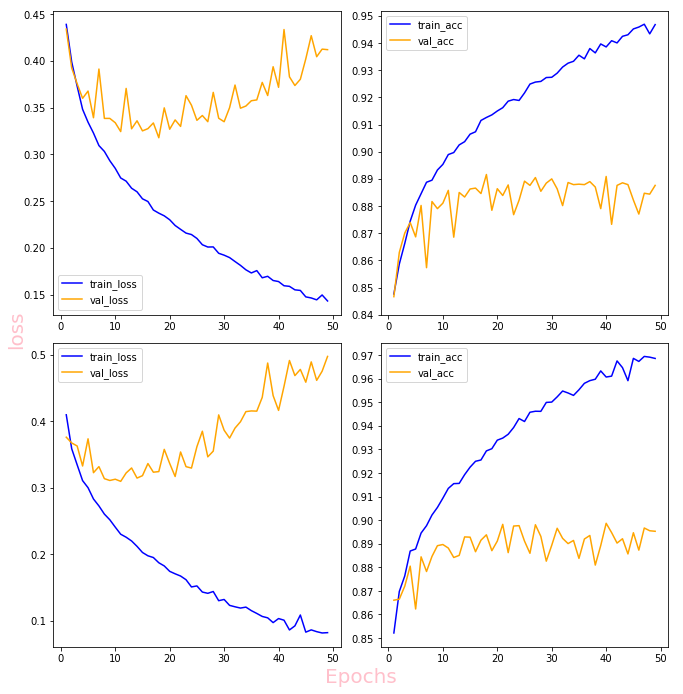

In [55]:
# 두 모델 학습과정 비교
import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1,history_2,epochs):
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history
    keys = list(his_dict_1.keys())
    
    
    epochs = range(1,epochs)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1)
    
    
    #axis  선과 ax의 축 레이블을 제거합니다
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor = 'w', top=False,bottom=False,left=False,right=False)
    
    for i in range(len(his_dict_1)):
        temp_ax = fig.add_subplot(2,2,i+1)
        temp=keys[i%2]
        val_temp = keys[(i+2)%2 + 2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:],
                    color = 'blue', label='train_'+ temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:],
                    color = 'orange', label=val_temp)
        if(i==1 or i==3):
            start,end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start,2),end,0.01))
        temp_ax.legend()
    
    ax.set_ylabel('loss',size=20,color = "pink")
    ax.set_xlabel('Epochs',size=20,color = "pink")
    plt.tight_layout()
    plt.show()

draw_loss_acc(first_history,second_history,50)
#1행은 첫번째 모델 , 2행은 두번째 모델 -> 둘다 OverFitting이 발생 -> 발생하기 전에 단계의 모델만 사용해야 한다
